In [2]:
# Dependencies
import os
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create path to file
path_summary = ('Cleaned_Data/total_national_expenditures.csv')
path_clinic_hospital = ('Cleaned_Data/hospital_vs_clinics_data.csv')
path_historical = ('Cleaned_Data/historical_healthcare_data_summary.csv')

In [3]:
# Read csv and convert into df
national_expend = pd.read_csv(path_summary,skipinitialspace=True)
national_expend = national_expend.set_index('Unnamed: 0')
del national_expend.index.name
national_expend.head()

,Total National Health Expenditures,Out of pocket,Health Insurance,Private Health Insurance,Medicare,Medicaid (Title XIX),POPULATION
1968,58402,20500,24379,11830,6218,3541,206
1969,65923,22601,27565,13363,7045,4174,208
1970,74563,24953,31763,15499,7672,5290,210
1971,82728,26312,36727,17840,8443,6695,213
1972,92657,28646,42617,20690,9325,8314,215


In [4]:
# Remove total column
compare_nontotal = national_expend.iloc[:, 1:6]
compare_nontotal.head()

,Out of pocket,Health Insurance,Private Health Insurance,Medicare,Medicaid (Title XIX)
1968,20500,24379,11830,6218,3541
1969,22601,27565,13363,7045,4174
1970,24953,31763,15499,7672,5290
1971,26312,36727,17840,8443,6695
1972,28646,42617,20690,9325,8314


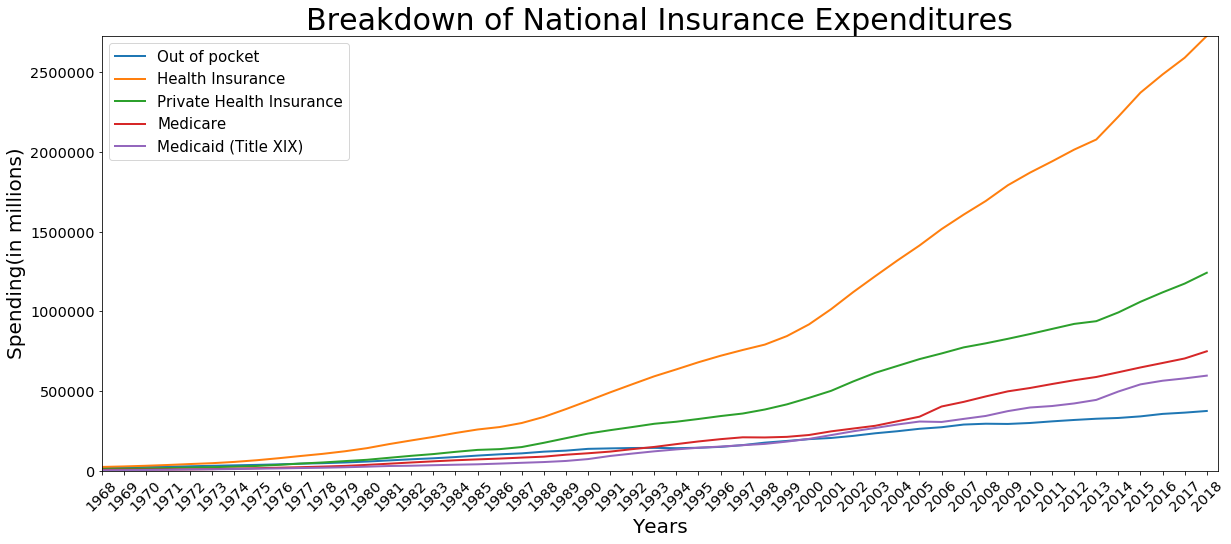

In [5]:
# Toying with graphs - need to limit info to see trends

# Creating variables for my limits
low = 0
high = compare_nontotal['Health Insurance'].max() +200
xlow = compare_nontotal.index.min()
xhigh = compare_nontotal.index.max()+0.5
x_axis = np.arange (xlow, xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (20, 8))
plt.plot(compare_nontotal, linewidth = 2)
plt.legend(labels = compare_nontotal, loc="best",  
           prop={'size': 15}, fancybox = True)
plt.title('Breakdown of National Insurance Expenditures', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Spending(in millions)', fontdict = {'fontsize' : 20})
plt.xticks(x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (xlow, xhigh)
plt.ylim (low, high)
plt.show()

In [6]:
# Clinic vs hosptial df
clinic_hospital = pd.read_csv(path_clinic_hospital,skipinitialspace=True)
clinic_hospital = clinic_hospital.set_index('Unnamed: 0')
del clinic_hospital.index.name
clinic_hospital.head()

,Total Hospital Expenditures,Total Physician and Clinical Expenditures
1968,20537.0,11344.0
1969,23367.0,12716.0
1970,27168.0,14331.0
1971,30224.0,15917.0
1972,33846.0,17706.0


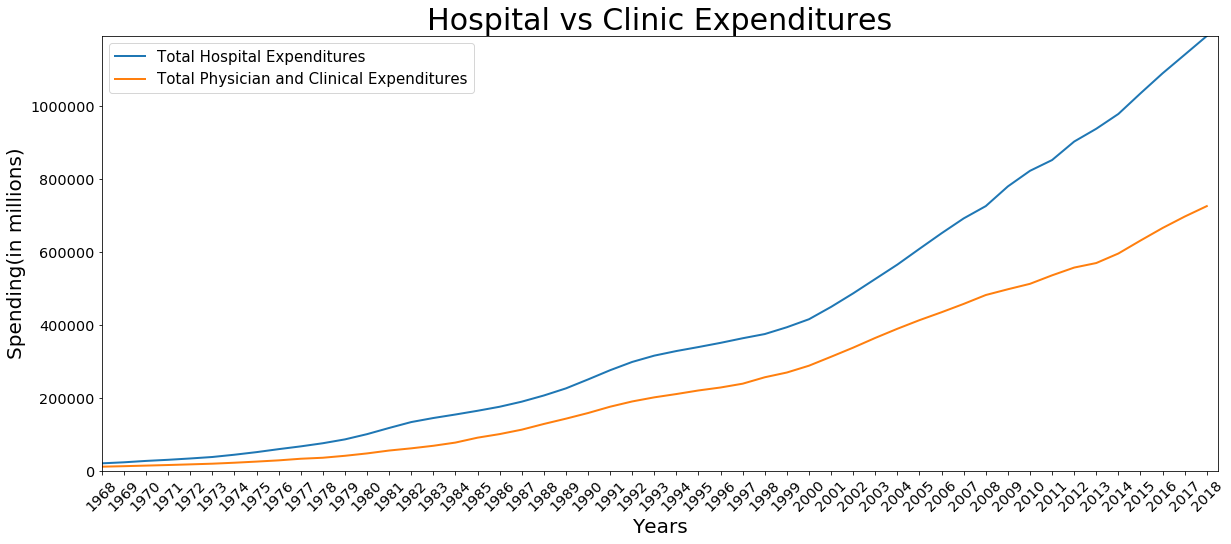

In [7]:
# Toying with graphs - need to limit info to see trends

# Creating variables for my limits
low = 0
high = clinic_hospital['Total Hospital Expenditures'].max() +200
xlow = clinic_hospital.index.min()
xhigh = clinic_hospital.index.max()+0.5
x_axis = np.arange (xlow, xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (20, 8))
plt.plot(clinic_hospital, linewidth = 2)
plt.legend(labels = clinic_hospital, loc="best",  
           prop={'size': 15}, fancybox = True)
plt.title('Hospital vs Clinic Expenditures', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Spending(in millions)', fontdict = {'fontsize' : 20})
plt.xticks(x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (xlow, xhigh)
plt.ylim (low, high)
plt.show()

In [8]:
# Clinic vs hosptial df
historical_data = pd.read_csv(path_historical,skipinitialspace=True)
historical_data = historical_data.set_index('index')
del historical_data.index.name
historical_data.head()

,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions)
1968,58.4,52.7,49.1,2.6,1.0,5.7,205.6,940.7
1969,65.9,59.1,55.5,2.4,1.2,6.8,207.6,1017.6
1970,74.6,67.0,63.1,2.6,1.4,7.5,210.2,1073.3
1971,82.7,74.3,69.4,3.2,1.7,8.4,212.8,1164.9
1972,92.7,83.3,77.2,4.3,1.9,9.3,214.9,1279.1


In [9]:
spend_compare = historical_data.iloc[:,2:6]
spend_compare.head()

,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment
1968,49.1,2.6,1.0,5.7
1969,55.5,2.4,1.2,6.8
1970,63.1,2.6,1.4,7.5
1971,69.4,3.2,1.7,8.4
1972,77.2,4.3,1.9,9.3


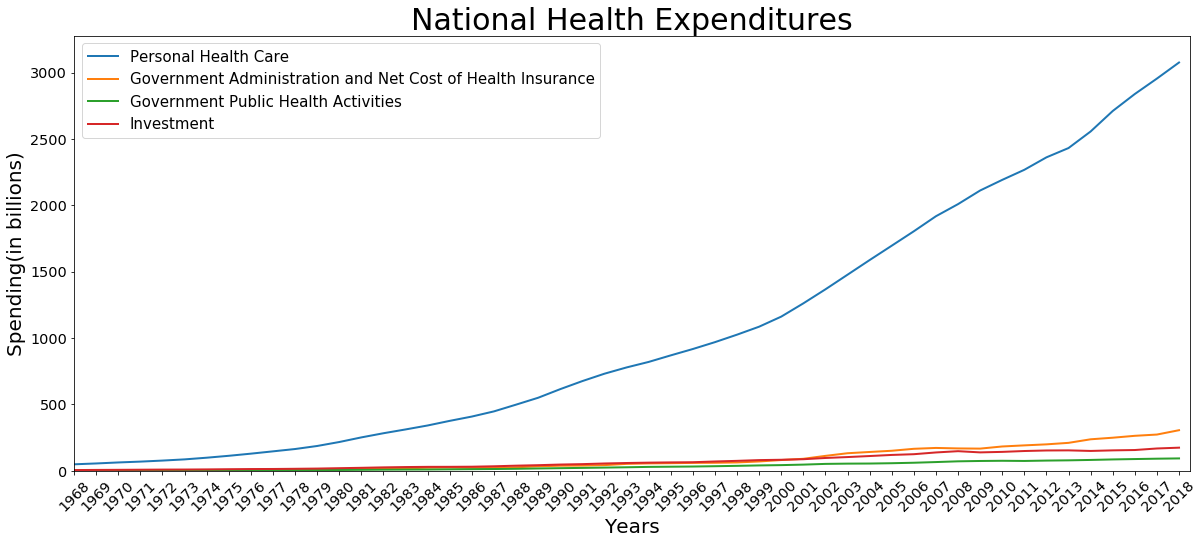

In [10]:
# Toying with graphs - need to limit info to see trends

# Creating variables for my limits
low = 0
high = spend_compare['Personal Health Care'].max() +200
xlow = spend_compare.index.min()
xhigh = spend_compare.index.max()+0.5
x_axis = np.arange (xlow, xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (20, 8))
plt.plot(spend_compare, linewidth = 2)
plt.legend(labels = spend_compare, loc="best",  
           prop={'size': 15}, fancybox = True)
plt.title('National Health Expenditures', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Spending(in billions)', fontdict = {'fontsize' : 20})
plt.xticks(x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (xlow, xhigh)
plt.ylim (low, high)
plt.show()